### This script contains the following:

#### 1. Importing libraries and data
#### 2. consistency checks
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Reflections

## 1. Import libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# create a path
path = r"C:\Users\Asus 17\OneDrive\Desktop\Achievement 6\amsterdam"

In [4]:
#import listings_numeric
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_numeric.csv'))

## 2. Consistency Checks

In [6]:
#check for missing values
df.isnull().sum()

Unnamed: 0                            0
id                                    0
host_id                               0
square_feet                       19624
price                                 0
weekly_price                      17187
monthly_price                     18469
security_deposit                   6166
cleaning_fee                       3629
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
number_of_reviews                     0
review_scores_rating               2639
review_scores_accuracy             2649
review_scores_cleanliness          2647
review_scores_checkin              2661
review_scores_communication        2652
review_scores_location             2660
review_scores_value                2659
calculated_host_listings_count        0
dtype: int64

In [7]:
df.shape

(20030, 22)

In [9]:
#duplicates check
dups = df.duplicated()

In [10]:
dups.shape

(20030,)

C:\Users\Asus 17\AppData\Local\Temp\ipykernel_5316\2624995657.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins = 25)


<Axes: xlabel='price', ylabel='Density'>

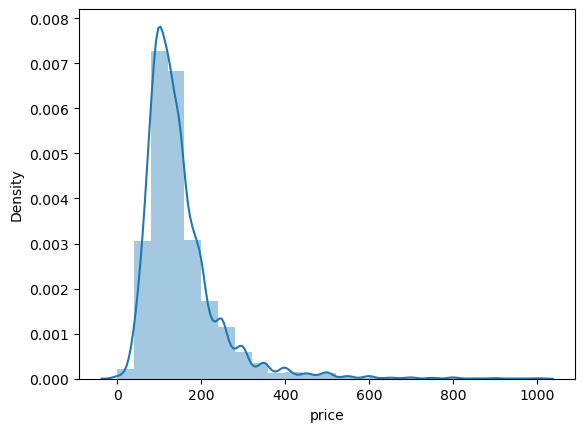

In [11]:
#extreme values check
sns.distplot(df['price'], bins = 25)

In [12]:
#check mean
df['price'].mean()

148.74473290064904

In [13]:
#summary stats
df[['price', 'number_of_reviews']].describe()

,price,number_of_reviews
count,20030.000000,20030.000000
mean,148.744733,21.560459
std,89.990324,43.240292
min,0.000000,0.000000
25%,95.000000,3.000000
50%,125.000000,8.000000
75%,175.000000,22.000000
max,999.000000,695.000000


## 3. Data prep for regression analysis

Text(0, 0.5, 'price')

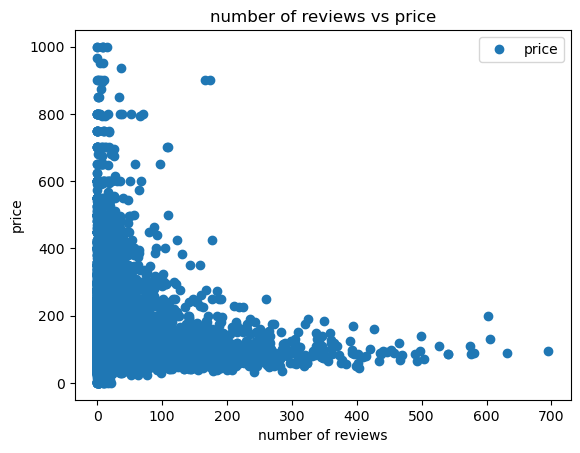

In [14]:
#create a scatterplot using matplotlib
df.plot(x = 'number_of_reviews', y = 'price', style = 'o')
plt.title('number of reviews vs price')
plt.xlabel('number of reviews')
plt.ylabel('price')

### Hypothesis:
If a property has fewer reviews, then it is more expensive

In [15]:
# reshape variables into NumPy arrays
X = df['number_of_reviews'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

In [16]:
X

array([[248],
       [ 42],
       [233],
       ...,
       [  0],
       [  0],
       [  0]], dtype=int64)

In [17]:
y

array([[ 59.],
       [160.],
       [ 80.],
       ...,
       [ 80.],
       [ 55.],
       [220.]])

In [18]:
# split into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 4. Regression Analysis

In [20]:
# Create a regression object
regression = LinearRegression()

In [21]:
# fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# predict the values of y using X
y_predicted = regression.predict(X_test)

Text(0, 0.5, 'Price')

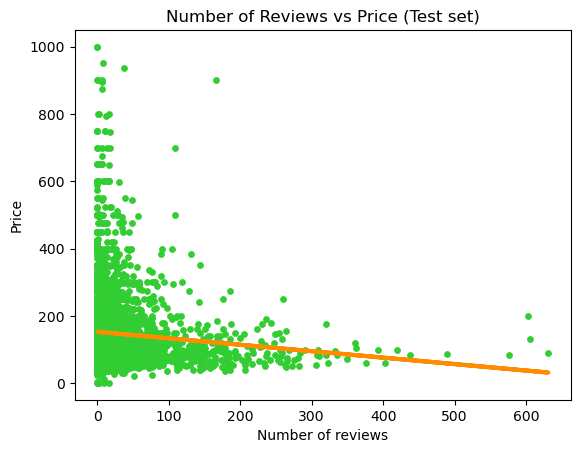

In [27]:
#creatze a plot showing the regression line from the model on the test set. 
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'limegreen', s = 15)
plot_test.plot(X_test, y_predicted, color = 'darkorange', linewidth = 3)
plot_test.title('Number of Reviews vs Price (Test set)')
plot_test.xlabel('Number of reviews')
plot_test.ylabel('Price')

While the line moves in a direction consistent with many of the points, it passes through relatively few of them. The area with the highest density of points ie: with fewer than 100 reviews, shows that the values deviate greatly from the line in both directions. 

In [25]:
# create objects that contain the model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [26]:
#Print the summary stats
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.19166672]]
Mean squared error:  8296.613495362995
R2 score:  0.009233026986117165


In [28]:
y_predicted 

array([[151.24882682],
       [151.44049354],
       [134.57382261],
       ...,
       [152.59049383],
       [141.47382435],
       [147.79882595]])

In [29]:
#create a dataframe to compare y and y_predicted
data = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_predicted.flatten()})

In [30]:
#take a look
data.head(20)

,Actual,Predicted
0,150.0,151.248827
1,140.0,151.440494
2,150.0,134.573823
3,80.0,143.965492
4,130.0,152.015494
5,105.0,147.798826
6,50.0,152.782161
7,100.0,151.248827
8,115.0,127.098821
9,89.0,152.590494


## 5. Reflections
There is clearly a big discrepancy between the actual values and the predicted values. This model cannot accurately predict property price from the number of reviews. 

This data could be biased due to the collection methods of reviews. The number of reviews may not be a good metric to compare properties which have been listed for different amounts of time. 
